# Question 3: Assortativity Analysis with Facebook100 Dataset

Analyse de l'assortativity pour 5 attributs sur les 100 réseaux:
1. **student/faculty status** (`student_fac`)
2. **major** (`major_index`)
3. **vertex degree** (degré du nœud)
4. **dorm** (`dorm`)
5. **gender** (`gender`)

## Import des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path
from tqdm import tqdm

plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 10

## Fonctions utiles

In [7]:
def compute_assortativity_categorical(G, attribute):
    "Cette fonction permet de calculer l'assortativity pour les attributs catégoriques."
    "on est parti du principe que quand un attribut catégorique prend la valeur 0, c'est qu'il s'agit d'une valeur manquante"
    "à ignorer."
    node_attrs = {}
    for node in G.nodes():
        val = G.nodes[node].get(attribute, 0)
        if val != 0:
            node_attrs[node] = val
    
    if len(node_attrs) < 2:
        print("nan")
        return np.nan
    
    G_sub = G.subgraph(node_attrs.keys()).copy()
    nx.set_node_attributes(G_sub, node_attrs, 'attr')
    
    try:
        assortativity = nx.attribute_assortativity_coefficient(G_sub, 'attr')
        return assortativity
    except:
        return np.nan


def compute_degree_assortativity(G):
    try:
        return nx.degree_assortativity_coefficient(G)
    except:
        return np.nan

## Chargement de tous les réseaux

In [5]:
data_dir = Path("data")  # Adapter si nécessaire

gml_files = sorted(list(data_dir.glob("*.gml")))

print(f"Nombre de fichiers trouvés: {len(gml_files)}")
print(f"Premiers fichiers: {[f.stem for f in gml_files[:5]]}")

Nombre de fichiers trouvés: 100
Premiers fichiers: ['American75', 'Amherst41', 'Auburn71', 'Baylor93', 'BC17']


## Calcul de l'assortativity pour tous les réseaux

In [8]:
attributes = {
    'student_fac': 'Student/Faculty Status',
    'major_index': 'Major',
    'dorm': 'Dorm',
    'gender': 'Gender'
}

results = []

for filepath in tqdm(gml_files, desc="Traitement"):
    try:
        G = nx.read_gml(filepath)
        
        if not nx.is_connected(G):
            largest_cc = max(nx.connected_components(G), key=len)
            G = G.subgraph(largest_cc).copy()
        
        network_name = filepath.stem
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        
        result = {
            'network': network_name,
            'n_nodes': num_nodes,
            'n_edges': num_edges
        }
        
        result['degree'] = compute_degree_assortativity(G)
        
        for attr_key, attr_name in attributes.items():
            result[attr_key] = compute_assortativity_categorical(G, attr_key)
        
        results.append(result)
        
    except Exception as e:
        print(f"Erreur avec {filepath.name}: {e}")
        continue

df = pd.DataFrame(results)
print("aperçu")
print(df.head())

Traitement: 100%|██████████| 100/100 [1:44:51<00:00, 62.92s/it]  

aperçu
      network  n_nodes  n_edges    degree  student_fac  major_index      dorm  \
0  American75     6370   217654  0.065959     0.288178     0.051212  0.272906   
1   Amherst41     2235    90954  0.058428     0.403411     0.032494  0.079390   
2    Auburn71    18448   973918  0.001046     0.192141     0.045380  0.389473   
3    Baylor93    12799   679815  0.078726     0.300317     0.050155  0.334425   
4        BC17    11498   486961  0.076015     0.533158     0.042043  0.139480   

     gender  
0  0.027141  
1  0.059762  
2  0.094621  
3  0.095714  
4  0.014488  


In [10]:
df.to_csv('outputs/question3/assortativity_all_networks.csv', index=False)


## Statistiques descriptives

In [11]:
attrs_to_analyze = ['student_fac', 'major_index', 'degree', 'dorm', 'gender']
attr_labels = {
    'student_fac': 'Student/Faculty',
    'major_index': 'Major',
    'degree': 'Degree',
    'dorm': 'Dorm',
    'gender': 'Gender'
}

for attr in attrs_to_analyze:
    values = df[attr].dropna()
    
    print(f" {attr_labels[attr]}:")
    print(f"Nombre de réseaux: {len(values)}/{len(df)}")
    print(f"Moyenne: {values.mean():.4f}")
    print(f"Médiane: {values.median():.4f}")
    print(f"Min: {values.min():.4f}")
    print(f"Max: {values.max():.4f}")
    print(f"Écart-type: {values.std():.4f}")
    
    positive = (values > 0).sum()
    negative = (values < 0).sum()
    print(f"nb Positifs: {positive} ({100*positive/len(values):.1f}%)")
    print(f"nb Négatifs: {negative} ({100*negative/len(values):.1f}%)")

 Student/Faculty:
Nombre de réseaux: 100/100
Moyenne: 0.3233
Médiane: 0.3165
Min: 0.1102
Max: 0.5428
Écart-type: 0.0925
nb Positifs: 100 (100.0%)
nb Négatifs: 0 (0.0%)
 Major:
Nombre de réseaux: 100/100
Moyenne: 0.0555
Médiane: 0.0503
Min: 0.0304
Max: 0.1509
Écart-type: 0.0214
nb Positifs: 100 (100.0%)
nb Négatifs: 0 (0.0%)
 Degree:
Nombre de réseaux: 100/100
Moyenne: 0.0626
Médiane: 0.0647
Min: -0.0662
Max: 0.1969
Écart-type: 0.0529
nb Positifs: 89 (89.0%)
nb Négatifs: 11 (11.0%)
 Dorm:
Nombre de réseaux: 100/100
Moyenne: 0.2267
Médiane: 0.2213
Min: 0.0794
Max: 0.4846
Écart-type: 0.0857
nb Positifs: 100 (100.0%)
nb Négatifs: 0 (0.0%)
 Gender:
Nombre de réseaux: 100/100
Moyenne: 0.0533
Médiane: 0.0550
Min: -0.0922
Max: 0.2461
Écart-type: 0.0509
nb Positifs: 89 (89.0%)
nb Négatifs: 11 (11.0%)


## Question 3(a): Visualisations

Pour chaque attribut:
1. **Scatter plot**: Assortativity vs taille du réseau (axes log-linéaires)
2. **Histogramme**: Distribution de l'assortativity

In [12]:
def plot_assortativity_analysis(df, attribute, label, output_dir):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    data = df[[attribute, 'n_nodes']].dropna()
    
    ax1.scatter(data['n_nodes'], data[attribute], alpha=0.6, s=50)
    ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, label='No assortativity')
    ax1.set_xscale('log')
    ax1.set_xlabel('Network size (n)')
    ax1.set_ylabel(f'{label} Assortativity')
    ax1.set_title(f'{label} Assortativity vs Network Size')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.hist(data[attribute], bins=30, edgecolor='black', alpha=0.7)
    ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No assortativity')
    ax2.axvline(x=data[attribute].mean(), color='green', linestyle='-', linewidth=2, 
                label=f'Mean = {data[attribute].mean():.3f}')
    ax2.set_xlabel(f'{label} Assortativity')
    ax2.set_ylabel('Number of Networks')
    ax2.set_title(f'{label} Assortativity Distribution')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig(output_dir / f'assortativity_{attribute}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return data[attribute].mean(), data[attribute].median()

attribut: Student/Faculty


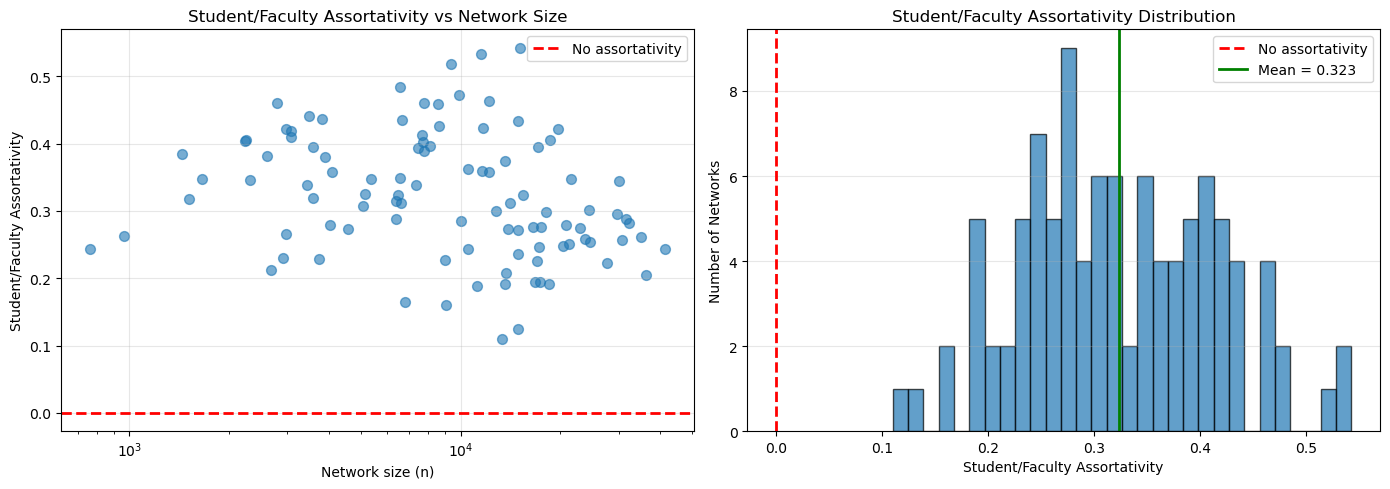

Moyenne: 0.3233
Médiane: 0.3165
attribut: Major


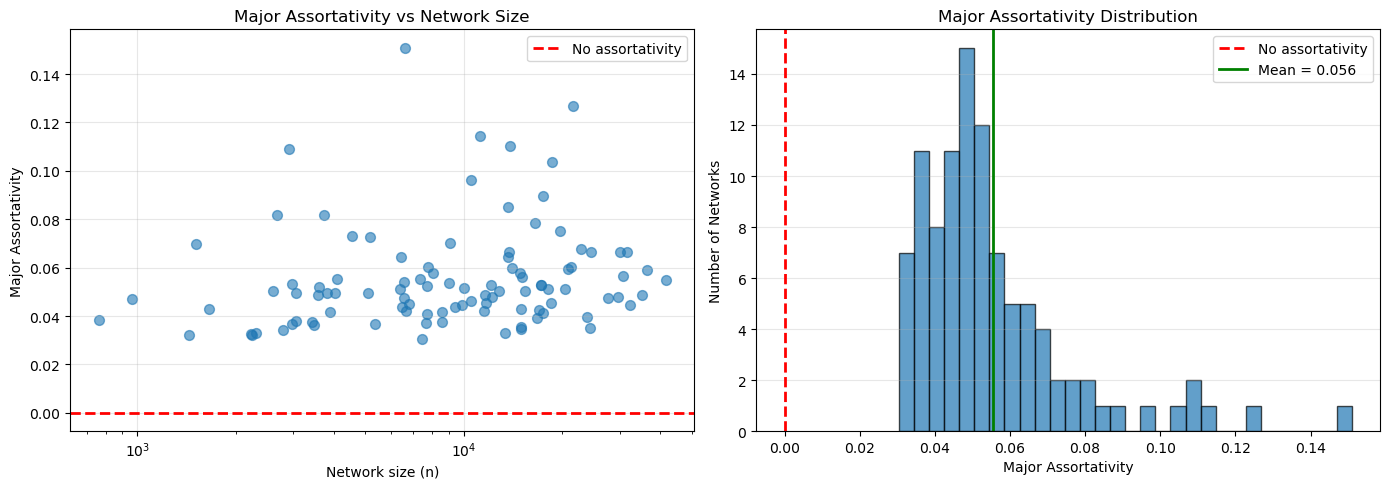

Moyenne: 0.0555
Médiane: 0.0503
attribut: Degree


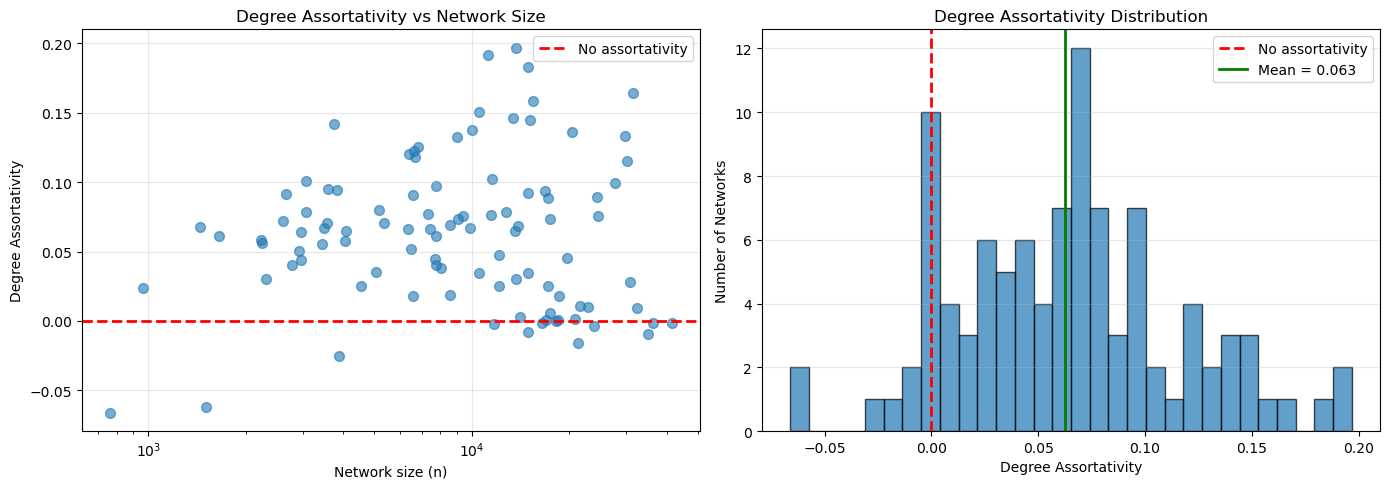

Moyenne: 0.0626
Médiane: 0.0647
attribut: Dorm


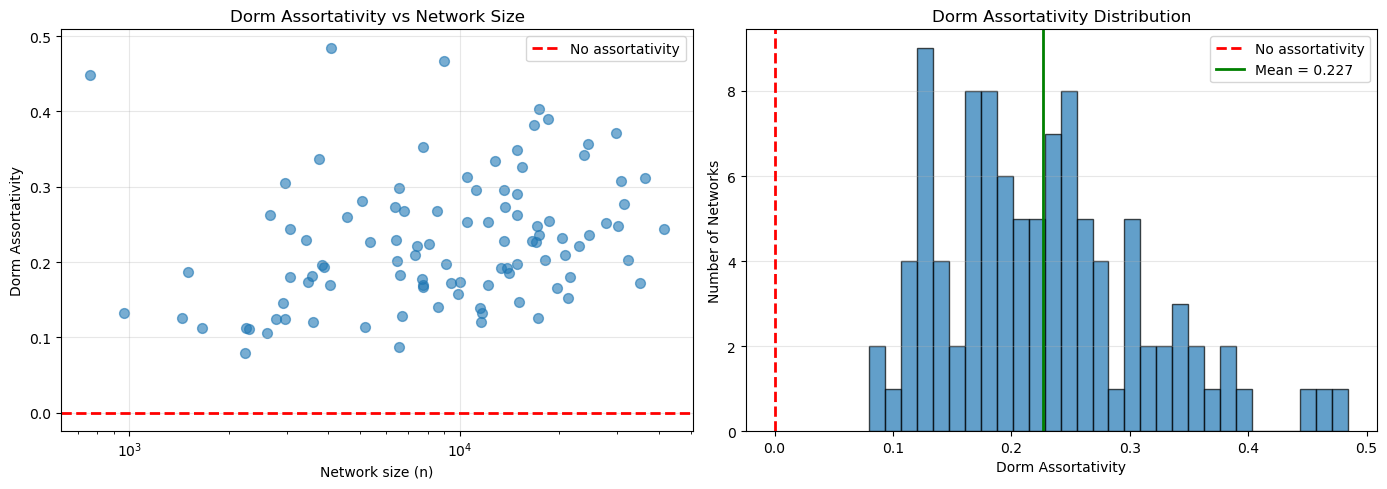

Moyenne: 0.2267
Médiane: 0.2213
attribut: Gender


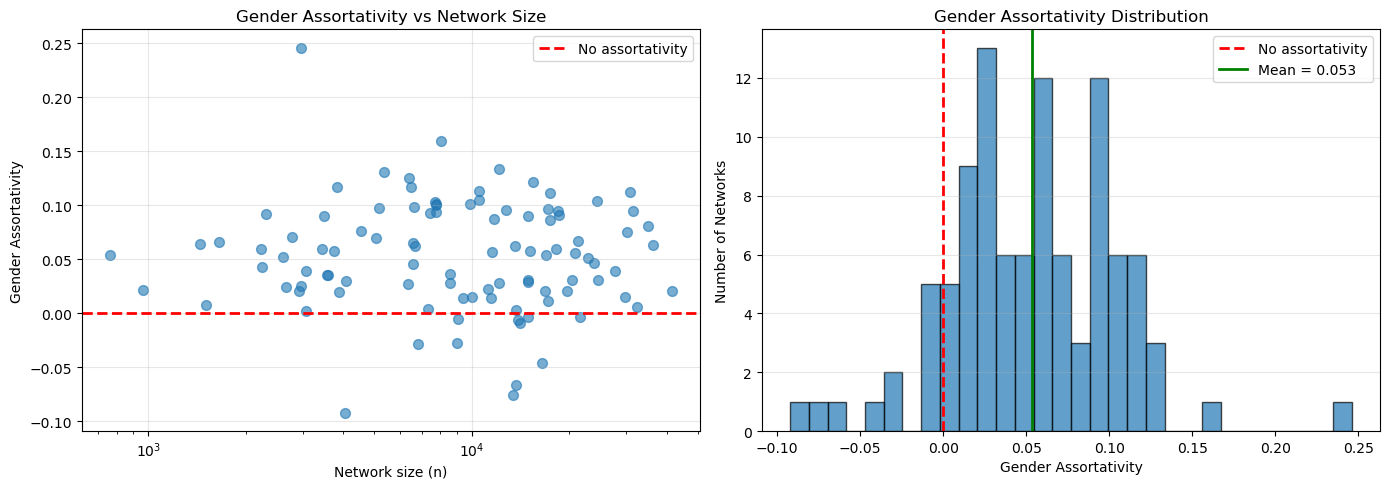

Moyenne: 0.0533
Médiane: 0.0550
      Attribute     Mean   Median
Student/Faculty 0.323277 0.316506
          Major 0.055502 0.050298
         Degree 0.062609 0.064682
           Dorm 0.226692 0.221308
         Gender 0.053251 0.055038


In [13]:
output_dir = Path('outputs/question3')

summary_stats = []

for attr in attrs_to_analyze:
    print(f"attribut: {attr_labels[attr]}")
    
    mean_val, median_val = plot_assortativity_analysis(df, attr, attr_labels[attr], output_dir)
    
    summary_stats.append({
        'Attribute': attr_labels[attr],
        'Mean': mean_val,
        'Median': median_val
    })
    
    print(f"Moyenne: {mean_val:.4f}")
    print(f"Médiane: {median_val:.4f}")

df_summary = pd.DataFrame(summary_stats)

print(df_summary.to_string(index=False))